In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    image_resized=resize(image,(224,224))
    
    images.append(image_resized)
    target.append(i)

target = np.array(target)
images = np.array(images)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.3,random_state=109)

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
base_model = tf.keras.applications.NASNetMobile(input_shape = (224, 224,3), include_top = False, weights = "imagenet")

19996672/19993432 [==============================] - 0s 0us/step


In [4]:
base_model.trainable = False

In [5]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(4, activation="softmax")                                     
                                ])

In [6]:
dataAugmentaion = ImageDataGenerator(rotation_range = 40, zoom_range = 0.20, 
fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
width_shift_range = 0.2, height_shift_range = 0.2)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [8]:
history=model.fit_generator(dataAugmentaion.flow(X_train, y_train, batch_size = 16),
 validation_data = (X_test, y_test), steps_per_epoch = len(X_train) // 16,
 epochs = 30)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
7/7 [==============================] - 35s 3s/step - loss: 1.6044 - accuracy: 0.1934 - val_loss: 1.1334 - val_accuracy: 0.4792
Epoch 2/30
7/7 [==============================] - 17s 2s/step - loss: 1.1496 - accuracy: 0.4983 - val_loss: 0.8855 - val_accuracy: 0.7917
Epoch 3/30
7/7 [==============================] - 17s 3s/step - loss: 0.9087 - accuracy: 0.6865 - val_loss: 0.7221 - val_accuracy: 0.8125
Epoch 4/30
7/7 [==============================] - 17s 2s/step - loss: 0.7604 - accuracy: 0.6957 - val_loss: 0.6301 - val_accuracy: 0.8333
Epoch 5/30
7/7 [==============================] - 17s 2s/step - loss: 0.6549 - accuracy: 0.7781 - val_loss: 0.5697 - val_accuracy: 0.8750
Epoch 6/30
7/7 [==============================] - 17s 2s/step - loss: 0.5712 - accuracy: 0.8233 - val_loss: 0.5255 - val_accuracy: 0.8542
Epoch 7/30
7/7 [==============================] - 17s 2s/step - loss: 0.5842 - accuracy: 0.7625 - val_loss: 0.5014 - val_accuracy: 0.8750
Epoch 8/30
7/7 [==================

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('nasnet_model.h5')

In [10]:
y_pred = model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[[4.19177115e-04 3.29753757e-03 8.71296898e-02 9.09153581e-01]
 [9.15068805e-01 5.36189750e-02 1.17495302e-02 1.95626542e-02]
 [3.27739376e-03 4.44389403e-01 1.43019319e-01 4.09313858e-01]
 [9.94242966e-01 3.24808178e-03 5.77409810e-04 1.93148328e-03]
 [7.98897294e-04 5.53068472e-03 7.10770905e-01 2.82899439e-01]
 [6.43172145e-01 2.40304530e-01 5.24307750e-02 6.40925914e-02]
 [9.45185363e-01 1.80420950e-02 1.60073675e-02 2.07652133e-02]
 [9.23249871e-04 9.25600290e-01 5.66027090e-02 1.68737881e-02]
 [2.47446727e-03 1.15508787e-01 1.83312327e-01 6.98704481e-01]
 [3.54704316e-05 9.94618356e-01 3.67899681e-03 1.66716683e-03]
 [3.04255373e-04 9.62946713e-01 1.05669675e-02 2.61821132e-02]
 [7.12082256e-04 3.25423270e-03 8.68346989e-02 9.09198999e-01]
 [1.06891036e-01 4.32425380e-01 1.05249099e-01 3.55434448e-01]
 [2.62822560e-03 1.09391816e-01 3.17235082e-01 5.70744872e-01]
 [9.95242774e-01 1.24133832e-03 5.40922221e-04 2.97493883e-03]
 [2.95951078e-03 2.07276806e-01 6.147

In [11]:
import cv2
import itertools
import random
from collections import Counter
from glob import iglob
import os


def load_image(filename):
    img = cv2.imread(os.path.join(filename))
    img = cv2.resize(img, (224, 224) )
    img = img /255
    
    return img

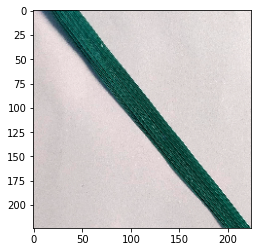

Predicted Disease is Healthy


In [17]:
import matplotlib.pyplot as plt


%matplotlib inline
img = load_image('/content/drive/MyDrive/kaggle/rice/newricedisease/Healthy/Copy of IMG_20190424_125829.jpg')
p = model.predict(np.asarray([img]))[0]
plt.imshow(img)    
plt.show()
k = target_names
class_idx = np.argmax(p)
s = [str(i) for i in p] 
a = int(class_idx) 
print("Predicted Disease is", k[a])